# Numerical Recipes Workshop 5
For the week of 21-25 October, 2019

This notebook will cover random number generation and some relevant plotting.

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Random Numbers
The [numpy.random](https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generator.html) module contains functionality for generating random numbers in a variety of distributions.

The most basic function available is `np.random.random`, which generates an even distribution of random numbers over the interval [0, 1), that is, from 0 to 1 including 0 and excluding 1.

```
print(np.random.random())
```

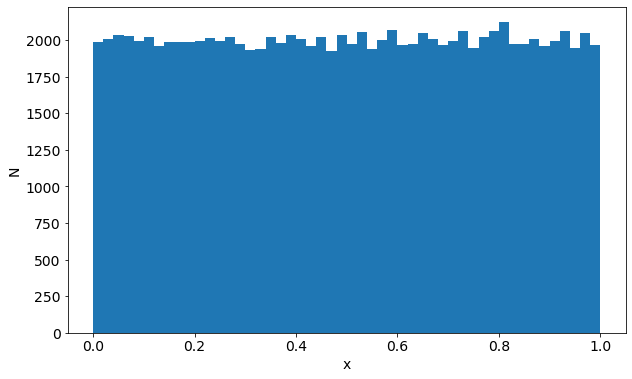

In [3]:
sample = np.random.random(100000)
hist, bins, p = plt.hist(sample, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.show()

The random sample can be mapped to a different range and central value.

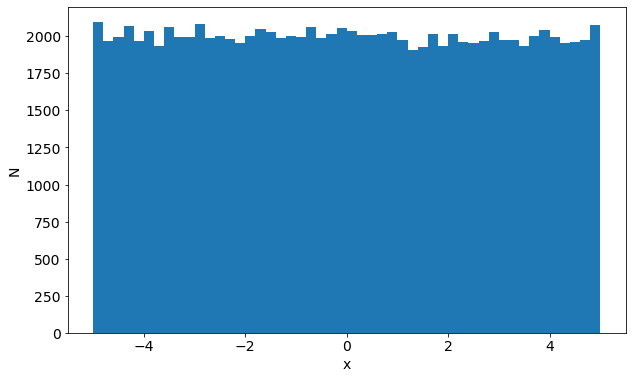

In [4]:
# values in [-5, 5)
sample = 10 * np.random.random(100000) - 5
hist, bins, p = plt.hist(sample, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.show()

Converting the sample to integer type will give random integers.

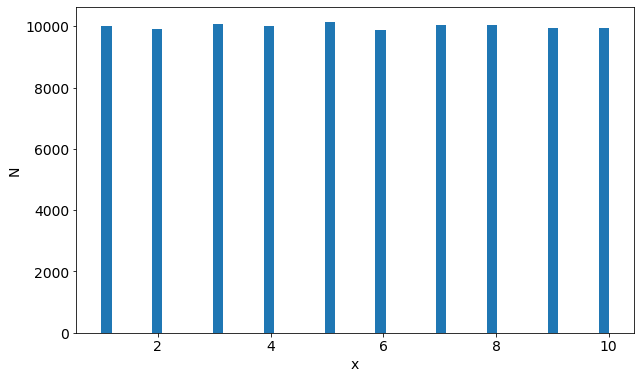

In [5]:
# integers over [1, 10]
sample = (10 * np.random.random(100000) + 1).astype(int)
hist, bins, p = plt.hist(sample, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.show()

This can also be accomplished with the `np.random.randint` function.

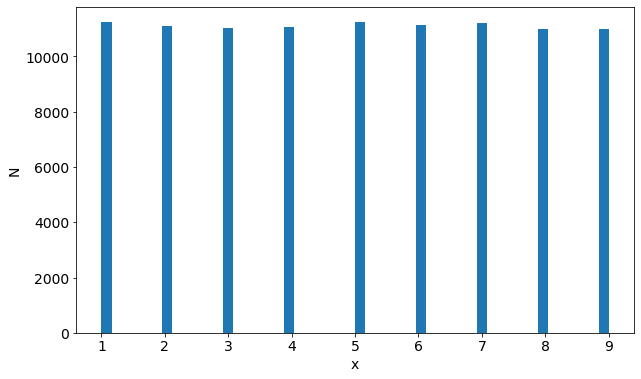

In [6]:
# integers over [1, 10]
sample = np.random.randint(1, 10, 100000)
hist, bins, p = plt.hist(sample, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.show()

### Normal Distributions
The `np.random.normal` function will generate random numbers whose distribution is described by a Gaussian with a given mean and standard deviation.

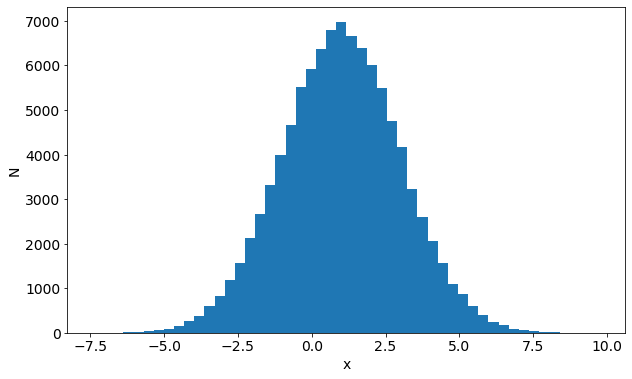

Mean = 1.0014409952169923, std. = 2.00106448558228.


In [7]:
sample = np.random.normal(1, 2, 100000)
hist, bins, p = plt.hist(sample, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.show()
print(f'Mean = {sample.mean()}, std. = {sample.std()}.')

There are [many more distributions](https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generator.html) that can be generated. Try some of them.

## Visualizing 2D distributions
The [hist2d](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html#matplotlib.pyplot.hist2d) can display a histogram of a 2D distribution with a color mapping, similar to the [pcolormesh](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib.pyplot.pcolormesh) function.

In [12]:
x = np.random.normal(loc=0, scale=1, size=100000)
y = np.random.normal(loc=0, scale=1, size=100000)

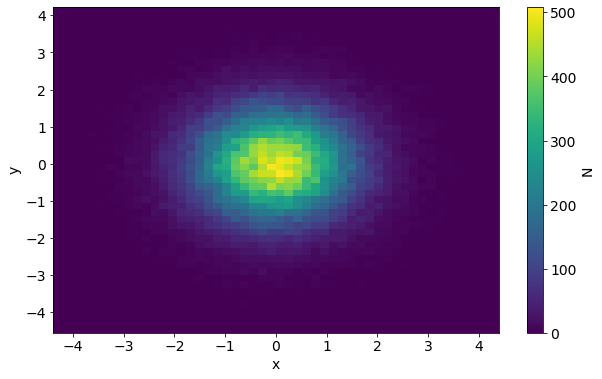

In [9]:
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.viridis)
plt.colorbar(label='N')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Hebxin plots
Visualizing a 2D distribution with rectangular bins a [number of known drawbacks](https://www.meccanismocomplesso.org/en/hexagonal-binning-a-new-method-of-visualization-for-data-analysis/). Another approach is to create hexagonal bins. This can be done with the [hexbin](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html#matplotlib.pyplot.hexbin) command.

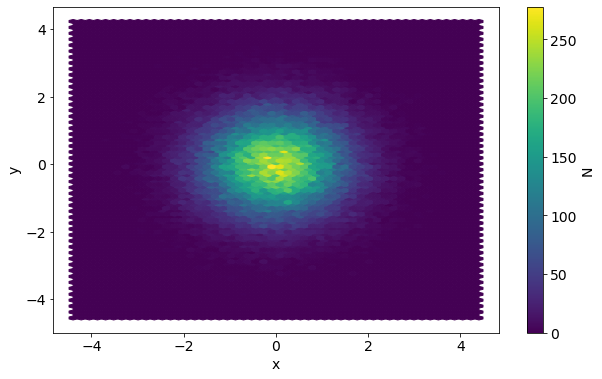

In [10]:
plt.hexbin(x, y, gridsize=(50, 50), cmap=plt.cm.viridis)
plt.colorbar(label='N')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Reproducible random numbers
Quite often, it is desirable to be able to create the same set of random numbers multiple times. The sample is still randomly distributed, but the exact numbers are known. This is done by creating a seeded random number generator. The seed can take many forms, but an integer is useful as it can be recorded exactly for later use. The [np.random.default_rng](https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generator.html#numpy.random.default_rng) function will create a seeded random number generator that can be used or passed into other functions.

In [13]:
gen = np.random.default_rng(1234)
x = gen.random(100000)

In [14]:
gen2 = np.random.default_rng(1234)
x2 = gen2.random(100000)

In [15]:
print ('All x and x2 equal:', (x == x2).all())

All x and x2 equal: True


### If the above didn't work...
The `default_rng` function is available in versions of NumPy after 1.17. If the above functions created an error, the code below will give the same result.

In [17]:
gen = np.random.RandomState(1234)
x = gen.rand(100000)

gen2 = np.random.RandomState(1234)
x2 = gen2.rand(100000)

print ('All x and x2 equal:', (x == x2).all())

All x and x2 equal: True


## Visualizing data with high dynamic range
In a normal distribution, about 99.7% of the sample is contained within 3 standard deviations of the mean. However, it is often necessary to visualize the long tails of the distribution. In this case, it is better to view the data in log-space. This technique is generally useful when working with values that span many orders of magnitude.

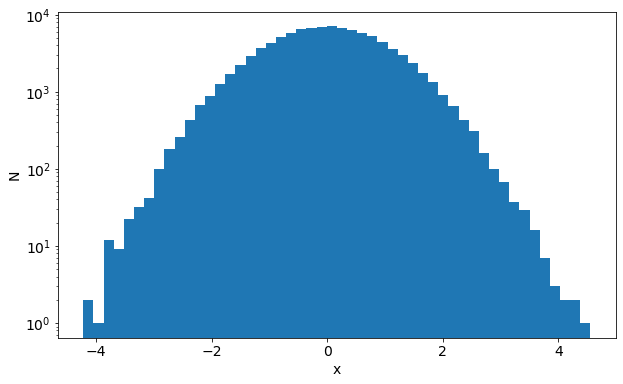

Mean = 0.0013994010604008041, std. = 0.9998678699100352.


In [18]:
sample = np.random.normal(0, 1, 100000)
hist, bins, p = plt.hist(sample, bins=50)
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('N')
plt.show()
print(f'Mean = {sample.mean()}, std. = {sample.std()}.')

This is very useful with power-law distributions.

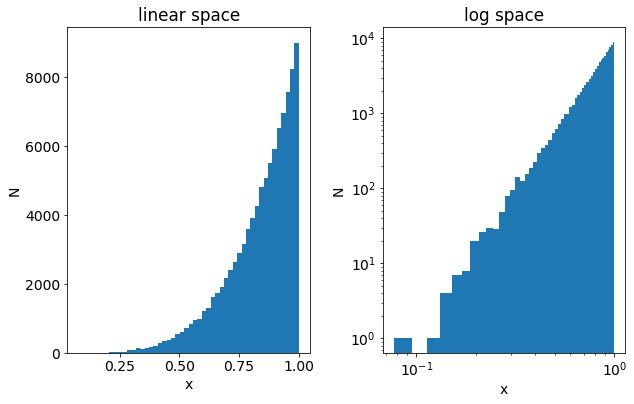

In [19]:
sample = np.random.power(5, 100000)

plt.subplot(121)
hist, bins, p = plt.hist(sample, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.title('linear space')

plt.subplot(122)
plt.xscale('log')
plt.yscale('log')
hist, bins, p = plt.hist(sample, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.xticks([0.1, 1])
plt.title('log space')

plt.subplots_adjust(wspace=0.3)
plt.show()

This can also be done for 2D distributions.

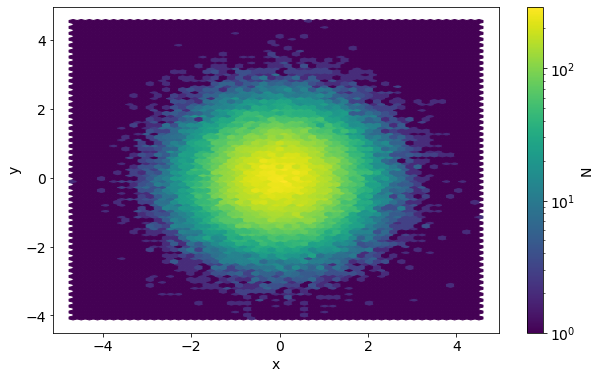

In [20]:
x = np.random.normal(loc=0, scale=1, size=100000)
y = np.random.normal(loc=0, scale=1, size=100000)
plt.hexbin(x, y, gridsize=(50, 50), bins='log', cmap=plt.cm.viridis)
plt.colorbar(label='N')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## The Monte-Carlo method for estimating the value of $\pi$
How might the value of $\pi$ be calculated with a random distribution of (x, y) pairs in the range [0, 1)? How well does this value agree with `np.pi` as you increase the sample size?

In [3]:
N = 100000
circle_count = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    
    y_circle = np.sqrt(1-np.power(x,2))
    if abs(y) < abs(y_circle):
        circle_count += 1

circle_area = (circle_count/N)*4
pi = circle_area
print(pi)
        

3.14628
